### Experiment-10 Locally Weighted regression

In [1]:
# Implement the non-parametric Locally Weighted Regression algorithm in order to fitdata points. Select appropriate data set for your experiment and draw graphs.

In [2]:
# Reference Algorithms
# https://www.vtupulse.com/machine-learning/locally-weighted-regression-algorithm-in-python/

In [3]:
# Importing Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
# Declaring functions
def kernel(point, xmat, k):
    m,n = np.shape(xmat)
    weights = np.mat(np.eye((m)))
    for j in range(m):
        diff = point - X[j]
        weights[j,j] = np.exp(diff*diff.T/(-2.0*k**2))
    return weights

def localWeight(point, xmat, ymat, k):
    wei = kernel(point,xmat,k)
    W = (X.T*(wei*X)).I*(X.T*(wei*ymat.T))
    return W
     
def localWeightRegression(xmat, ymat, k):
    m,n = np.shape(xmat)
    ypred = np.zeros(m)
    for i in range(m):
        ypred[i] = xmat[i]*localWeight(xmat[i],xmat,ymat,k)
    return ypred

In [5]:
# load data points
data = pd.read_csv('Datasets\\rest_bill.csv')
bill = np.array(data.total_bill)
tip = np.array(data.tip)

In [6]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
#preparing and add 1 in bill
mbill = np.mat(bill)
mtip = np.mat(tip)

In [8]:
m= np.shape(mbill)[1]
one = np.mat(np.ones(m))
X = np.hstack((one.T,mbill.T))

In [9]:
#set k here
ypred = localWeightRegression(X,mtip,0.5)
SortIndex = X[:,1].argsort(0)
xsort = X[SortIndex][:,0]

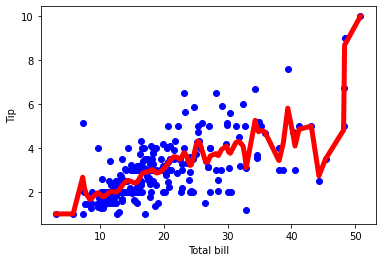

In [10]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(bill,tip, color='blue')
ax.plot(xsort[:,1],ypred[SortIndex], color = 'red', linewidth=5)
plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.show();